In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import statsmodels.api as sm

In [5]:
churnData = pd.read_csv('/Users/haddock_ana/Ironhack/Unit 8 - Machine Learning advanced/lab-8.5/Customer-Churn.txt')

In [6]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [8]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [18]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [19]:
churnData['TotalCharges'].iloc[488]

nan

In [20]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [21]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

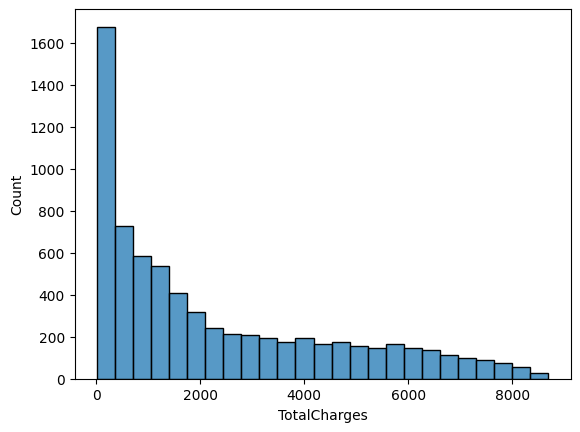

In [22]:
import seaborn as sns
sns.histplot(churnData.TotalCharges);

In [23]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

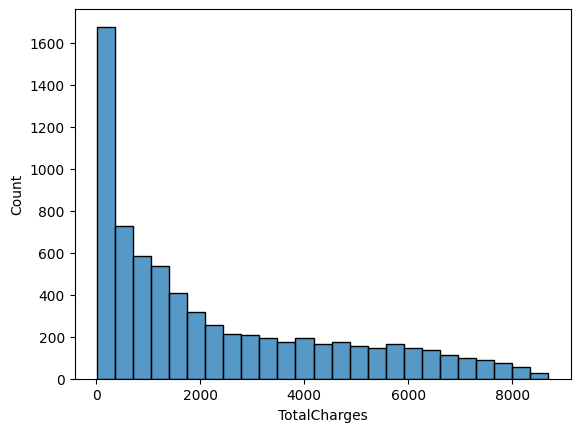

In [24]:
sns.histplot(churnData.TotalCharges);

In [39]:
churnData_subset = churnData[['tenure','SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [40]:
churnData_subset.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes


In [41]:
churnData_subset['Churn'] = churnData['Churn'].replace({'No': 0, 'Yes': 1})
# churnData['Churn'] = churnData['Churn'].apply(lambda x: 0 if x == 'No' else 1)



In [42]:
churnData_subset_cat = churnData_subset[['SeniorCitizen', 'Churn' ]]

In [45]:
churnData_subset_cat.head()

,SeniorCitizen,Churn
0,0,0
1,0,0
2,0,1
3,0,0
4,0,1


In [43]:
churnData_subset_num = churnData_subset.drop(columns=churnData_subset_cat)

In [44]:
churnData_subset_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


### Normalizer

In [37]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

In [46]:
X_num = churnData_subset_num

In [47]:
transformer=StandardScaler().fit(X_num)
x_normalized=transformer.transform(X_num)
print(x_normalized.shape)
pd.DataFrame(x_normalized)

(7043, 3)


,0,1,2
0,-1.277445,-1.160323,-0.994971
1,0.066327,-0.259629,-0.173876
2,-1.236724,-0.362660,-0.960399
3,0.514251,-0.746535,-0.195400
4,-1.236724,0.197365,-0.941193
...,...,...,...
7038,-0.340876,0.665992,-0.129281
7039,1.613701,1.277533,2.242808
7040,-0.870241,-1.168632,-0.855182
7041,-1.155283,0.320338,-0.872777


### Scaling

In [48]:
transformer=MinMaxScaler().fit(X_num)
transformer
x_scaled=transformer.transform(X_num)
print(x_scaled.shape)
pd.DataFrame(x_scaled)

(7043, 3)


,0,1,2
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330
...,...,...,...
7038,0.333333,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.152778,0.112935,0.037809
7041,0.055556,0.558706,0.033210


### Linear Regression Model

In [49]:
Y = churnData_subset_cat['Churn']
X = np.concatenate((x_scaled, churnData_subset_cat.drop(columns='Churn')), axis=1)
X = sm.add_constant(X) 
model = sm.OLS(Y,X).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     533.1
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        20:55:53   Log-Likelihood:                -3303.9
No. Observations:                7043   AIC:                             6618.
Df Residuals:                    7038   BIC:                             6652.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1919      0.013     14.318      0.0

In [50]:
Y = churnData_subset_cat['Churn']
X = np.concatenate((x_normalized, churnData_subset_cat.drop(columns='Churn')), axis=1)
X = sm.add_constant(X) 
model = sm.OLS(Y,X).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     533.1
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        20:56:10   Log-Likelihood:                -3303.9
No. Observations:                7043   AIC:                             6618.
Df Residuals:                    7038   BIC:                             6652.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2476      0.005     48.943      0.0

### Logistic Regression Model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [52]:
x = np.concatenate((x_scaled, churnData_subset_cat.drop(columns='Churn')), axis=1)
Y = churnData_subset_cat['Churn']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, stratify=Y, random_state=42)
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [54]:
model.score(X_test, y_test)

0.7835344215755855

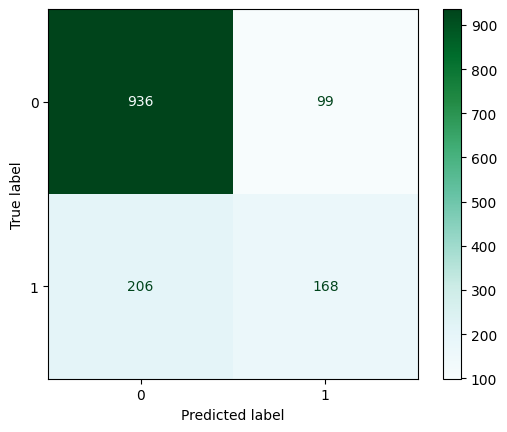

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_predicted=model.predict(X_test)
confusion_matrix(y_test, y_predicted)

%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuGn')

* en 936 casos en los que el cliente no es churn, el modelo acierta que no es churn
* Has 206 casos en los que no ha sido capaz de predecir el churn
* 99 casos dice que es Churn y no lo es
* Acierta 168 casos que son churn

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.45      0.52       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


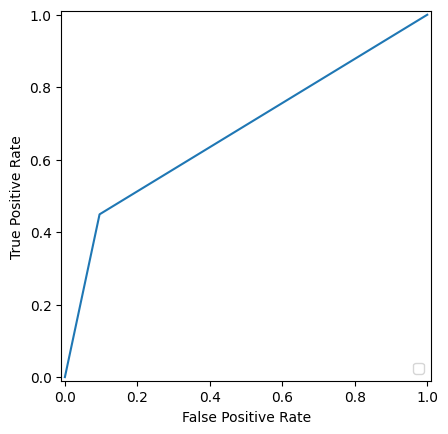

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted) #y_test, y_test
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

### Imbalance management

In [66]:
import statsmodels.api as sm

In [79]:
data = pd.concat((pd.DataFrame(x_scaled), churnData_subset_cat), axis=1)

In [80]:
data.head()

,0,1,2,SeniorCitizen,Churn
0,0.013889,0.115423,0.001275,0,0
1,0.472222,0.385075,0.215867,0,0
2,0.027778,0.354229,0.010310,0,1
3,0.625000,0.239303,0.210241,0,0
4,0.027778,0.521891,0.015330,0,1


In [106]:
data.rename(columns={0: 'tenure', 1: 'MonthlyCharges', 2: 'TotalCharges'}, inplace=True)

In [107]:
data.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
0,0.013889,0.115423,0.001275,0,0
1,0.472222,0.385075,0.215867,0,0
2,0.027778,0.354229,0.010310,0,1
3,0.625000,0.239303,0.210241,0,0
4,0.027778,0.521891,0.015330,0,1


In [81]:
data['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [82]:
1869/len(data['Churn'])

0.2653698707936959

#### Downsampling

##### Method 1

In [152]:
category_0 = data[data['Churn'] == 0]
category_1 = data[data['Churn'] == 1]

In [153]:
category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [154]:
data_Downsampling = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data_Downsampling = data_Downsampling.sample(frac=1)
data_Downsampling['Churn'].value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [155]:
x = data_Downsampling
Y = data_Downsampling['Churn']

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, stratify=Y, random_state=42)
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [156]:
model.score(X_test, y_test)

1.0

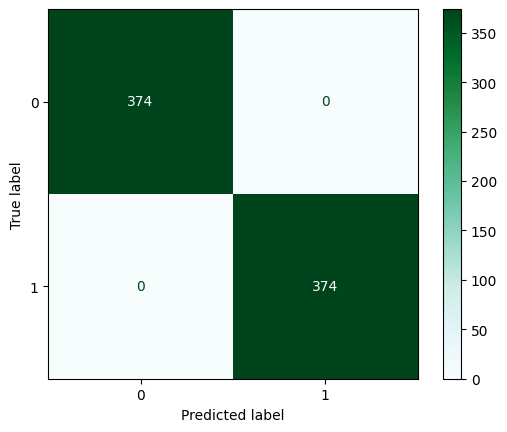

In [157]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_predicted=model.predict(X_test)
confusion_matrix(y_test, y_predicted)

%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuGn')

##### Method 2 (Tomeklinks)

In [145]:
from imblearn.under_sampling import TomekLinks

In [146]:
tl = TomekLinks()

In [147]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [148]:
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

Churn
0    4651
1    1869
Name: count, dtype: int64

In [149]:
x = X
Y = y

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, stratify=Y, random_state=42)
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [150]:
model.score(X_test, y_test)

0.7835344215755855

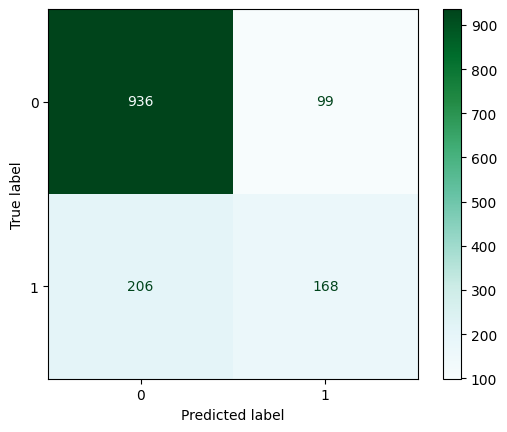

In [151]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_predicted=model.predict(X_test)
confusion_matrix(y_test, y_predicted)

%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuGn')

#### Upsampling

##### Method 1

In [121]:
category_0 = data[data['Churn'] == 0]
category_1 = data[data['Churn'] == 1]

In [122]:
print(len(category_0))
print(len(category_1))

5174
1869


In [123]:
category_1 = category_1.sample(len(category_0), replace=True) #cada observación puede aparecer n veces hasta llegar al total de la muestra (multiplicas 4843 hasta llegar a 90569 )
print(category_1.shape) 

(5174, 5)


In [124]:
data_Upsampling_1 = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data_Upsampling_1 = data_Upsampling_1.sample(frac=1)
data_Upsampling_1['Churn'].value_counts()

Churn
1    5174
0    5174
Name: count, dtype: int64

In [125]:
x = data_Upsampling_1
Y = data_Upsampling_1['Churn']

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, stratify=Y, random_state=42)
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [126]:
model.score(X_test, y_test)

1.0

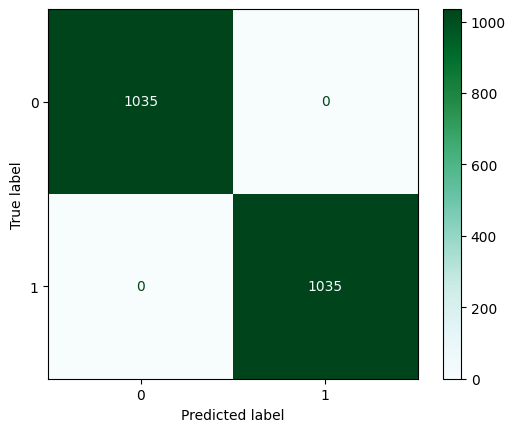

In [127]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_predicted=model.predict(X_test)
confusion_matrix(y_test, y_predicted)

%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuGn')

##### Method 2 (SMOTE)

In [139]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [140]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [141]:
x = X_sm
Y = y_sm

In [142]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, stratify=Y, random_state=42)
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [143]:
model.score(X_test, y_test)

0.7309178743961353

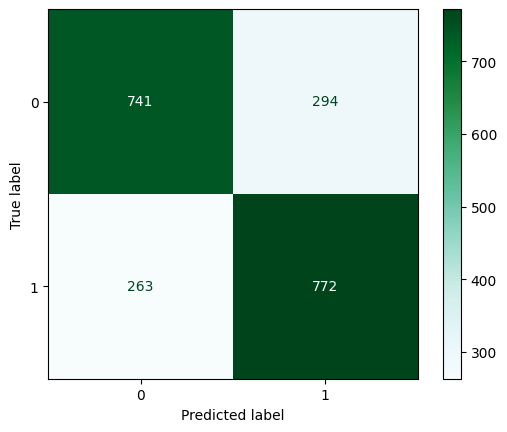

In [144]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_predicted=model.predict(X_test)
confusion_matrix(y_test, y_predicted)

%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuGn')

### Logistic Regression Model Imbalence Managed Conclusion

* Tras balancear las variables para obtener el mismo peso en las categorías, hemos logrado mejorar significativamente el modelo. No solo hemos incrementado el coeficiente de determinación (R²) de 0.78 a 1, sino que también hemos observado mejoras en los resultados presentados en la matriz de confusión.

In [ ]:
category_0 = data[data['Churn'] == 0]
category_1 = data[data['Churn'] == 1]

In [ ]:
data_Upsampling_1 = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data_Upsampling_1 = data_Upsampling_1.sample(frac=1)
data_Upsampling_1['Churn'].value_counts()

In [158]:
x = data_Upsampling_1
Y = data_Upsampling_1['Churn']

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, stratify=Y, random_state=42)
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)


model.score(X_test, y_test)

1.0

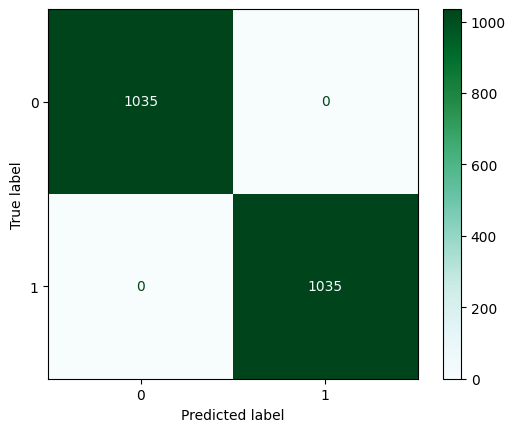

In [159]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_predicted=model.predict(X_test)
confusion_matrix(y_test, y_predicted)

%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuGn')